# Code giải thuật decision tree


Accuracy: 1.0


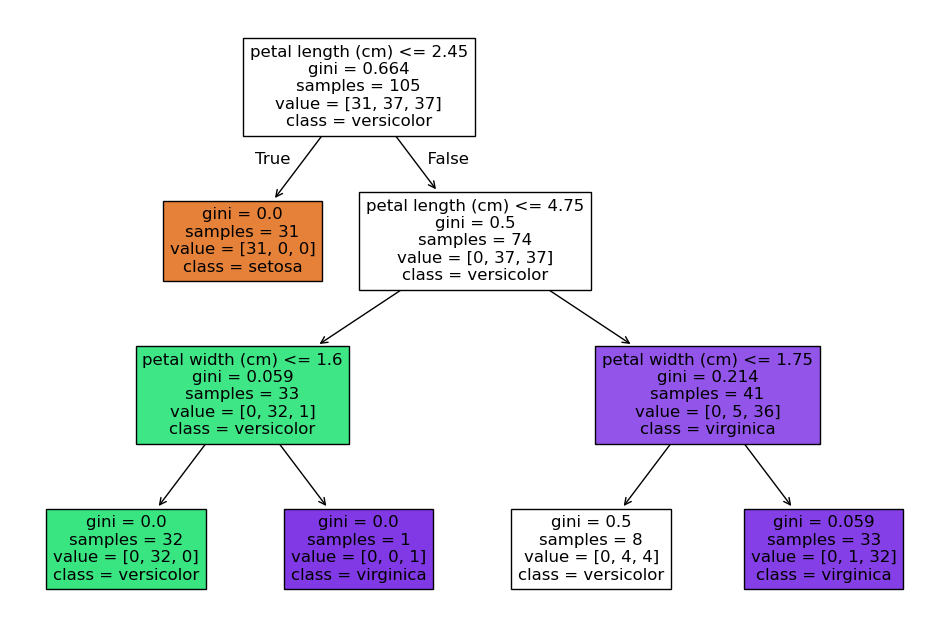

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True) # Load data mẫu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Chia train test

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42) # Tạo mô hình cây

model.fit(X_train, y_train) # Training 

y_pred = model.predict(X_test) # Dự đoán

print("Accuracy:", accuracy_score(y_test, y_pred)) # Đánh giá

# Vẽ cây quyết định
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.show()


# Triển khai Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Tạo mô hình RF
rf = RandomForestClassifier(
    n_estimators=100,    # Số cây 
    max_depth=None,      # Độ sâu tối đa
    random_state=42
)

#Training
rf.fit(X_train, y_train)

#Predict và đánh giá
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 1.0


# Đánh giá tầm quan trọng của RF

In [ ]:
import pandas as pd
import numpy as np

# Lấy độ quan trọng của các đặc trưng
importances = rf.feature_importances_
feature_names = load_iris().feature_names

# Show độ quan trọng của các đặc trưng
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


# Hyperparameter Tuning

### Sử dụng GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)


Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9428571428571428


### Sử dụng RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)
print("Best params:", random_search.best_params_)


Best params: {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 20}


# SVM Model

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


# Gaussian Naive Bayes Model

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

texts = ["Tôi là Tiến Minh", "Gymbro của Huỳnh Anh Nhựt", "Anh em mình thế thôi", "học bá sgu"]
labels = [1, 0, 1, 0]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.0


# Thực hành SVM model

### Import thư viện, load data, chia train/test

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu Iris từ sklearn
iris = datasets.load_iris()

# Xem mô tả dữ liệu
print(iris.DESCR)

# Tách đặc trưng và nhãn
data = iris.data
target = iris.target

# Tên các đặc trưng
print("Tên các đặc trưng:", iris.feature_names)
print("Tên các lớp:", iris.target_names)

# Chia dữ liệu train/test theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=101
)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Tạo mô hình

Độ chính xác của mô hình SVM: 96.67 %

Báo cáo phân loại:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



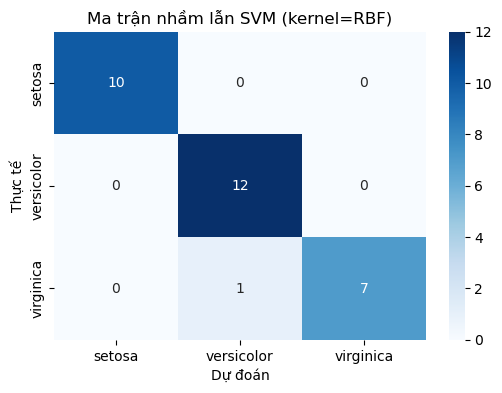

In [ ]:
# Khởi tạo mô hình phân lớp SVM
clf = svm.SVC()  # mặc định kernel='rbf', C=1.0, gamma='scale'

# Huấn luyện mô hình với tập dữ liệu huấn luyện
clf.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = clf.predict(X_test)

# --- Đánh giá mô hình ---
# Độ chính xác
acc = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình SVM:", round(acc * 100, 2), "%")

# Báo cáo chi tiết precision, recall, f1-score
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn SVM (kernel=RBF)')
plt.show()


### Đánh giá ACC

In [7]:
# --- Đánh giá độ chính xác trên tập huấn luyện và kiểm tra ---
train_acc = clf.score(X_train, y_train)  # Độ chính xác trên tập huấn luyện
val_acc = clf.score(X_test, y_test)      # Độ chính xác trên tập kiểm tra

print("Độ chính xác trên tập huấn luyện (Training accuracy): {:.2f}%".format(train_acc * 100))
print("Độ chính xác trên tập kiểm tra (Validation accuracy): {:.2f}%".format(val_acc * 100))

Độ chính xác trên tập huấn luyện (Training accuracy): 95.00%
Độ chính xác trên tập kiểm tra (Validation accuracy): 96.67%


Find Kernel

In [ ]:
# Danh sách các loại kernel cần thử
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Các biến để lưu mô hình tốt nhất, độ chính xác cao nhất và kernel tương ứng
best_svm = None
best_val_acc = -1
best_kernel = None

# Huấn luyện các mô hình với từng kernel
for kernel in kernels:
    clf = svm.SVC(kernel=kernel, probability=True, random_state=101)
    clf.fit(X_train, y_train)
    
    # Tính độ chính xác trên tập kiểm tra
    tmp_val_acc = clf.score(X_test, y_test)
    
    print(f"Kernel = {kernel:8s} | Validation accuracy = {tmp_val_acc * 100:.2f}%")
    
    # Nếu mô hình hiện tại tốt hơn mô hình trước -> cập nhật mô hình tốt nhất
    if tmp_val_acc > best_val_acc:
        best_val_acc = tmp_val_acc
        best_svm = clf
        best_kernel = kernel

# Hiển thị kết quả tốt nhất
print("\n🔹 Best validation accuracy: {:.2f}% with kernel: '{}'".format(best_val_acc * 100, best_kernel))


Kernel = linear   | Validation accuracy = 100.00%
Kernel = poly     | Validation accuracy = 100.00%
Kernel = rbf      | Validation accuracy = 96.67%
Kernel = sigmoid  | Validation accuracy = 26.67%

🔹 Best validation accuracy: 100.00% with kernel: 'linear'


### Bài tập thực hành 2 SVM

## Bài toán 2: Xây dựng mô hình dựa vào giải thuật SVM trên dữ liệu hình ảnh Handwritten-Digit-MNIST-
SVM. Dữ liệu lấy từ https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm

### Import thư viện và tải dữ liệu là tập các hình ảnh viết tay từ số 0 đến số 9

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Tải dữ liệu chữ số viết tay (0–9)
digits = load_digits(n_class=10)

# Kiểm tra thông tin dữ liệu
print("Kích thước tập dữ liệu:", digits.data.shape)
print("Kích thước ảnh mỗi mẫu:", digits.images[0].shape)
print("Số lượng nhãn:", len(np.unique(digits.target)))
print("Các nhãn có trong tập dữ liệu:", np.unique(digits.target))


Kích thước tập dữ liệu: (1797, 64)
Kích thước ảnh mỗi mẫu: (8, 8)
Số lượng nhãn: 10
Các nhãn có trong tập dữ liệu: [0 1 2 3 4 5 6 7 8 9]


### Khảo sát thông tin

In [10]:
# Tải dữ liệu
digits = load_digits(n_class=10)

# Xem toàn bộ thông tin của đối tượng 'digits'
print("=== Thông tin tổng quan về đối tượng digits ===")
print(digits)

# Xem dữ liệu của một hình dưới dạng ma trận 8x8
print("\n=== Ảnh đầu tiên dưới dạng ma trận 8x8 ===")
print(digits['data'][0].reshape(8, 8))

# Xem dữ liệu của một hình dưới dạng mảng (flatten 1D gồm 64 phần tử)
print("\n=== Ảnh đầu tiên dưới dạng mảng (1D) ===")
print(digits['data'][0])

# Xem 9 nhãn đầu tiên trong tập dữ liệu
print("\n=== 9 nhãn đầu tiên trong tập dữ liệu ===")
print(digits['target'][0:9])

=== Thông tin tổng quan về đối tượng digits ===
{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixe

### Vẽ hình 

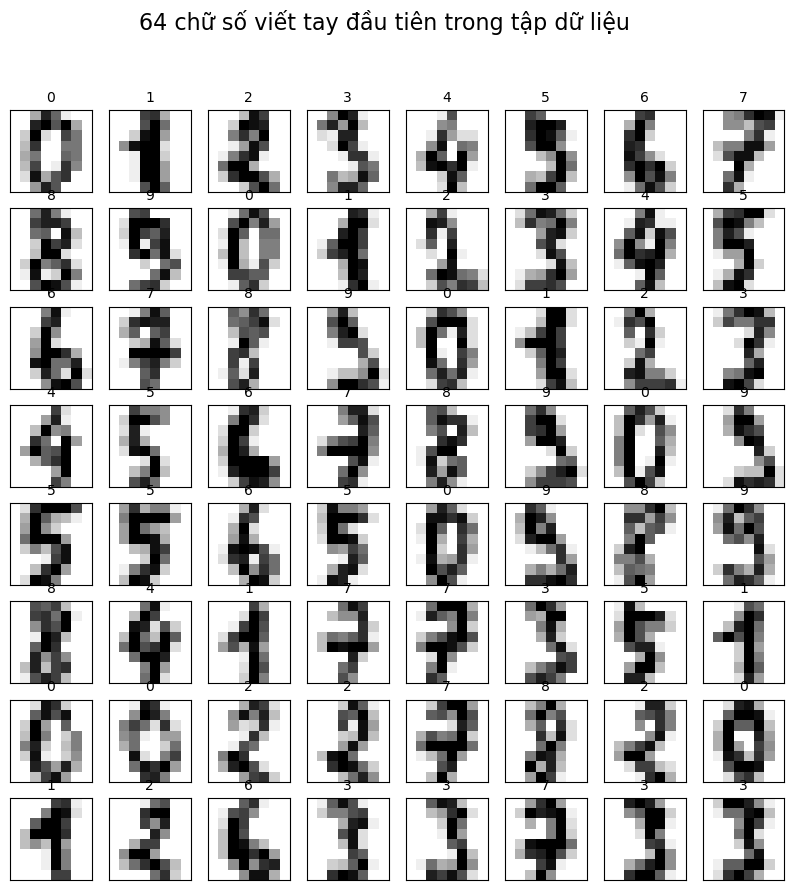

In [11]:
fig, ax = plt.subplots(8, 8, figsize=(10, 10))  # Tạo lưới 8x8 ô
for i, axi in enumerate(ax.flat):               # Duyệt qua từng ô
    axi.imshow(digits.images[i], cmap='binary') # Hiển thị ảnh ở dạng thang xám
    axi.set(xticks=[], yticks=[])               # Ẩn trục x, y
    axi.set_title(f"{digits.target[i]}", fontsize=10)  # Ghi nhãn thật của ảnh
plt.suptitle("64 chữ số viết tay đầu tiên trong tập dữ liệu", fontsize=16)
plt.show()

### Vẽ hình từ ma trận 8x8

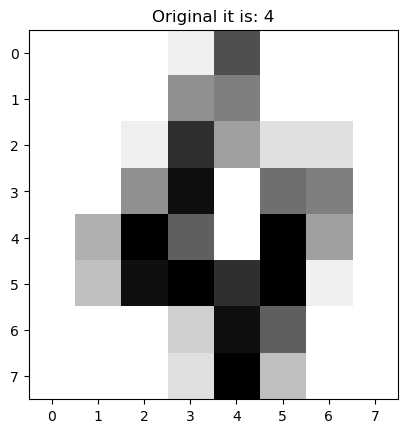

In [13]:
def view_digit(index):
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r)
    plt.title('Original it is: ' + str(digits.target[index]))
    plt.show()

view_digit(4)

## Nhiệm vụ 2: Xây dựng mô hình SVM để nhận diện chữ viết tay từ 0 – 9

### Chuẩn bị data

🎯 Độ chính xác của mô hình SVM: 0.9527027027027027

📊 Báo cáo phân loại:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.94      1.00      0.97        30
           2       1.00      1.00      1.00        27
           3       1.00      0.80      0.89        30
           4       0.97      0.91      0.94        33
           5       0.91      1.00      0.95        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.84      0.93      0.88        28
           9       0.91      0.94      0.92        31

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.95      0.95       296

🧩 Ma trận nhầm lẫn:
 [[26  0  0  0  1  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  2  0  0  4  0]
 [ 0  0  0  0 

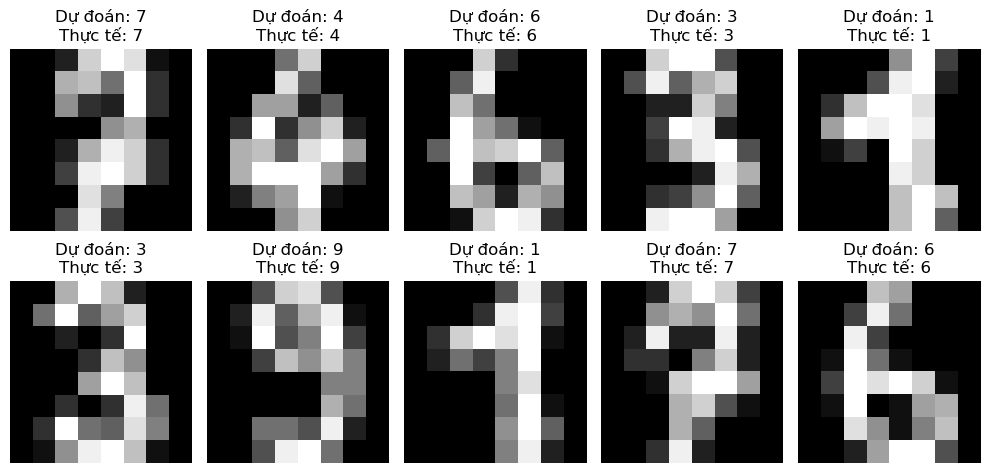

In [14]:
digits = load_digits(n_class=10)

# 3. Chuẩn bị dữ liệu
main_data = digits['data']     # Dữ liệu ảnh (64 giá trị xám)
targets = digits['target']     # Nhãn tương ứng (0–9)

# 4. Khởi tạo và huấn luyện mô hình SVM
svc = svm.SVC(gamma=0.001, C=100)
svc.fit(main_data[:1500], targets[:1500])   # Huấn luyện trên 1500 mẫu đầu

# 5. Dự đoán nhãn cho các mẫu còn lại
predictions = svc.predict(main_data[1501:])

# 6. Đánh giá độ chính xác của mô hình
acc = accuracy_score(targets[1501:], predictions)
print("🎯 Độ chính xác của mô hình SVM:", acc)
print("\n📊 Báo cáo phân loại:\n", classification_report(targets[1501:], predictions))

# 7. Ma trận nhầm lẫn
print("🧩 Ma trận nhầm lẫn:\n", confusion_matrix(targets[1501:], predictions))

# 8. Hiển thị một vài ảnh dự đoán và nhãn thực tế
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[1501 + i], cmap='gray')
    ax.set_title(f"Dự đoán: {predictions[i]}\nThực tế: {targets[1501 + i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### Đánh giá hiệu quả

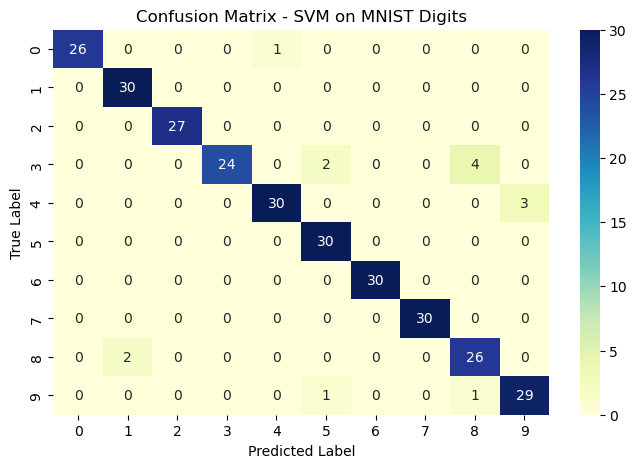

In [15]:
cm = confusion_matrix(targets[1501:], predictions)

# Tạo DataFrame để vẽ heatmap
conf_matrix = pd.DataFrame(data=cm)

# Vẽ heatmap
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix - SVM on MNIST Digits")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### IN dạng văn bản

In [16]:
print(classification_report(targets[1501:], predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.94      1.00      0.97        30
           2       1.00      1.00      1.00        27
           3       1.00      0.80      0.89        30
           4       0.97      0.91      0.94        33
           5       0.91      1.00      0.95        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.84      0.93      0.88        28
           9       0.91      0.94      0.92        31

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.95      0.95       296

